In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.ml.clustering import BisectingKMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [16]:
df = pd.read_csv("Acoustic_Extinguisher_Fire_Dataset.csv")
df=df.dropna()
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['FUEL'] = encoder.fit_transform(df['FUEL'])

In [17]:
df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0,10,96,0.0,75,0
1,1,0,10,96,0.0,72,1
2,1,0,10,96,2.6,70,1
3,1,0,10,96,3.2,68,1
4,1,0,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17437,7,2,190,86,2.2,5,0
17438,7,2,190,84,2.0,4,0
17439,7,2,190,80,1.5,3,0
17440,7,2,190,76,0.4,2,0


In [18]:
spark = SparkSession.builder.appName("HierarchicalClusteringExample").getOrCreate()

In [19]:
data1 = spark.createDataFrame(df)
data1

DataFrame[SIZE: bigint, FUEL: bigint, DISTANCE: bigint, DESIBEL: bigint, AIRFLOW: double, FREQUENCY: bigint, STATUS: bigint]

In [20]:
cl=list(df.columns[0:6])

In [21]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=cl,outputCol="features")

In [23]:
d=assembler.transform(data1)
d = d.select(['features'])
d.show()

+--------------------+
|            features|
+--------------------+
|[1.0,0.0,10.0,96....|
|[1.0,0.0,10.0,96....|
|[1.0,0.0,10.0,96....|
|[1.0,0.0,10.0,96....|
|[1.0,0.0,10.0,109...|
|[1.0,0.0,10.0,109...|
|[1.0,0.0,10.0,103...|
|[1.0,0.0,10.0,95....|
|[1.0,0.0,10.0,102...|
|[1.0,0.0,10.0,93....|
|[1.0,0.0,10.0,93....|
|[1.0,0.0,10.0,95....|
|[1.0,0.0,10.0,110...|
|[1.0,0.0,10.0,111...|
|[1.0,0.0,10.0,109...|
|[1.0,0.0,10.0,105...|
|[1.0,0.0,10.0,111...|
|[1.0,0.0,10.0,110...|
|[1.0,0.0,10.0,106...|
|[1.0,0.0,10.0,111...|
+--------------------+
only showing top 20 rows



In [24]:
bkm = BisectingKMeans().setK(2).setSeed(1)
model = bkm.fit(d)

In [25]:
predictions = model.transform(d)

In [26]:
predictions

DataFrame[features: vector, prediction: int]

In [27]:
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))
print("Cluster Centers: ")
centers = model.clusterCenters()
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.7143362339837641
Cluster Centers: 
[ 3.41176471  1.41176471 50.         98.16255144 10.28559671 31.61111111]
[  3.41176471   1.41176471 145.          94.77407407   3.99666667
  31.61111111]


In [28]:
type(predictions)

pyspark.sql.dataframe.DataFrame

In [29]:
df1 = predictions.toPandas()

In [30]:
df1

,features,prediction
0,"[1.0, 0.0, 10.0, 96.0, 0.0, 75.0]",0
1,"[1.0, 0.0, 10.0, 96.0, 0.0, 72.0]",0
2,"[1.0, 0.0, 10.0, 96.0, 2.6, 70.0]",0
3,"[1.0, 0.0, 10.0, 96.0, 3.2, 68.0]",0
4,"[1.0, 0.0, 10.0, 109.0, 4.5, 67.0]",0
...,...,...
17437,"[7.0, 2.0, 190.0, 86.0, 2.2, 5.0]",1
17438,"[7.0, 2.0, 190.0, 84.0, 2.0, 4.0]",1
17439,"[7.0, 2.0, 190.0, 80.0, 1.5, 3.0]",1
17440,"[7.0, 2.0, 190.0, 76.0, 0.4, 2.0]",1


In [31]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

In [32]:
x = df1["features"].values.tolist()

In [33]:
x

[DenseVector([1.0, 0.0, 10.0, 96.0, 0.0, 75.0]),
 DenseVector([1.0, 0.0, 10.0, 96.0, 0.0, 72.0]),
 DenseVector([1.0, 0.0, 10.0, 96.0, 2.6, 70.0]),
 DenseVector([1.0, 0.0, 10.0, 96.0, 3.2, 68.0]),
 DenseVector([1.0, 0.0, 10.0, 109.0, 4.5, 67.0]),
 DenseVector([1.0, 0.0, 10.0, 109.0, 7.8, 66.0]),
 DenseVector([1.0, 0.0, 10.0, 103.0, 9.7, 65.0]),
 DenseVector([1.0, 0.0, 10.0, 95.0, 12.0, 60.0]),
 DenseVector([1.0, 0.0, 10.0, 102.0, 13.3, 55.0]),
 DenseVector([1.0, 0.0, 10.0, 93.0, 15.4, 52.0]),
 DenseVector([1.0, 0.0, 10.0, 93.0, 15.1, 51.0]),
 DenseVector([1.0, 0.0, 10.0, 95.0, 15.2, 50.0]),
 DenseVector([1.0, 0.0, 10.0, 110.0, 15.4, 48.0]),
 DenseVector([1.0, 0.0, 10.0, 111.0, 15.2, 47.0]),
 DenseVector([1.0, 0.0, 10.0, 109.0, 15.4, 46.0]),
 DenseVector([1.0, 0.0, 10.0, 105.0, 15.2, 45.0]),
 DenseVector([1.0, 0.0, 10.0, 111.0, 16.0, 44.0]),
 DenseVector([1.0, 0.0, 10.0, 110.0, 15.7, 42.0]),
 DenseVector([1.0, 0.0, 10.0, 106.0, 15.4, 40.0]),
 DenseVector([1.0, 0.0, 10.0, 111.0, 15.5, 38.

[DenseVector([1.0, 0.0, 10.0, 96.0, 0.0, 75.0]), DenseVector([1.0, 0.0, 10.0, 96.0, 0.0, 72.0]), DenseVector([1.0, 0.0, 10.0, 96.0, 2.6, 70.0]), DenseVector([1.0, 0.0, 10.0, 96.0, 3.2, 68.0]), DenseVector([1.0, 0.0, 10.0, 109.0, 4.5, 67.0]), DenseVector([1.0, 0.0, 10.0, 109.0, 7.8, 66.0]), DenseVector([1.0, 0.0, 10.0, 103.0, 9.7, 65.0]), DenseVector([1.0, 0.0, 10.0, 95.0, 12.0, 60.0]), DenseVector([1.0, 0.0, 10.0, 102.0, 13.3, 55.0]), DenseVector([1.0, 0.0, 10.0, 93.0, 15.4, 52.0]), DenseVector([1.0, 0.0, 10.0, 93.0, 15.1, 51.0]), DenseVector([1.0, 0.0, 10.0, 95.0, 15.2, 50.0]), DenseVector([1.0, 0.0, 10.0, 110.0, 15.4, 48.0]), DenseVector([1.0, 0.0, 10.0, 111.0, 15.2, 47.0]), DenseVector([1.0, 0.0, 10.0, 109.0, 15.4, 46.0]), DenseVector([1.0, 0.0, 10.0, 105.0, 15.2, 45.0]), DenseVector([1.0, 0.0, 10.0, 111.0, 16.0, 44.0]), DenseVector([1.0, 0.0, 10.0, 110.0, 15.7, 42.0]), DenseVector([1.0, 0.0, 10.0, 106.0, 15.4, 40.0]), DenseVector([1.0, 0.0, 10.0, 111.0, 15.5, 38.0]), DenseVector([1

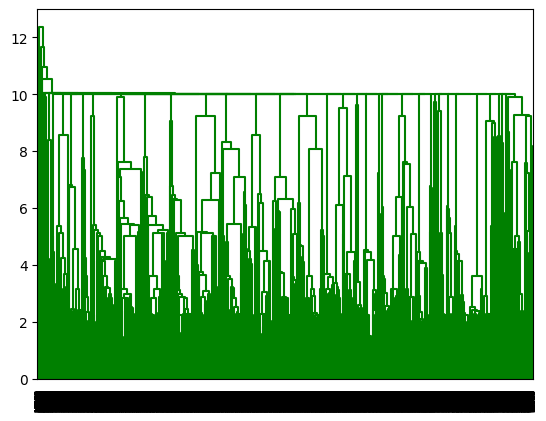

In [34]:
print(x)
temp = hierarchy.linkage(x, 'single')
plt.figure()
dn = hierarchy.dendrogram(
    temp, above_threshold_color="green", color_threshold=.7)